In [727]:
# import necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [728]:
# Import data set from raw file.
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [729]:
df.shape

(907, 27)

In [730]:
# there are 907 rows and 27 columns in this data set.

In [731]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [732]:
# out of 27 columns 15 columns are continuous type and 12 are categorical type.

# Preprocessing and EDA

In [733]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [734]:
# we have found that maximum columns are having null values.

In [735]:
df.columns # Checking column name

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [736]:
df.describe().T # hecking  stats of this data set>

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000


In [737]:
# from above stats we can say that
# 1. std deviation is higher than mean in capacity_mw column which is not looking normal. this is our target variable.
# 2. nan present in latitude column. 
# 3. nan present in longitude column. 
# 4. There is no data available in columns other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh.
# 5. further nan present in generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 etc.


In [738]:
df.nunique() # Checking Total no of unique values in each column.

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [739]:
# We can drop some features:

# estimated_generation_gwh: No Data Present.
# generation_data_source: Nominal data
# generation_gwh_2019: No Data Present.
# generation_gwh_2013: No Data Present.
# year_of_capacity_data: Nominal data
# wepp_id: No Data Present.
# and so on:
# geolocation_source, commissioning_year,other_fuel2,other_fuel3,country_long,country,url,name,gppd_idnr,owner,source: All are having either very less data or no any data or categorical and nominal data.

In [740]:
col=['estimated_generation_gwh','generation_data_source','generation_gwh_2019','generation_gwh_2013','year_of_capacity_data','wepp_id','geolocation_source','commissioning_year','other_fuel2','other_fuel3','country_long','country','url','name','gppd_idnr','owner','source']
df=df.drop(columns=col,axis=1)
df.head()
# Dropping the said column and check again.


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [741]:
df.shape # Checking shape again.

(907, 10)

In [742]:
df.nunique() # Checking no of total unique in each column after dropping the columns.

capacity_mw            361
latitude               836
longitude              827
primary_fuel             8
other_fuel1              3
generation_gwh_2014    371
generation_gwh_2015    396
generation_gwh_2016    403
generation_gwh_2017    408
generation_gwh_2018    410
dtype: int64

In [743]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   generation_gwh_2014  398 non-null    float64
 6   generation_gwh_2015  422 non-null    float64
 7   generation_gwh_2016  434 non-null    float64
 8   generation_gwh_2017  440 non-null    float64
 9   generation_gwh_2018  448 non-null    float64
dtypes: float64(8), object(2)
memory usage: 71.0+ KB


In [744]:
# from above information, checked that there are nan present approx each column.
# we will deal nan in catergorical column with mode method and with mean method in continuoud column.

In [745]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [746]:
df.isnull().sum()
# checking null values again. now there is no null in columns.

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [747]:
df.drop_duplicates(inplace=True)
df.shape
# Remove duplicates

(901, 10)

# Visualization

Coal       258
Hydro      247
Solar      126
Wind       122
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


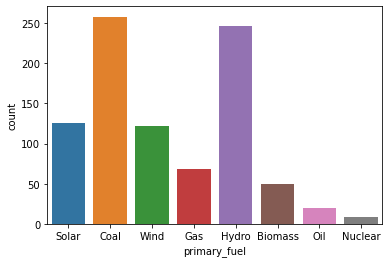

In [748]:
# Checking counts of categorical columns with count plot

sns.countplot(x='primary_fuel',data=df) # Checking target variable.
print(df['primary_fuel'].value_counts())

In [749]:
# Founda that most of the time Coal and Hydro are using as primany fuel.

Oil             898
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


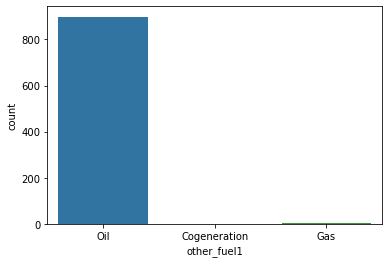

In [750]:
sns.countplot(x='other_fuel1',data=df)
print(df['other_fuel1'].value_counts())

In [751]:
# Found that almost maximum time oil is using as other fuel.

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

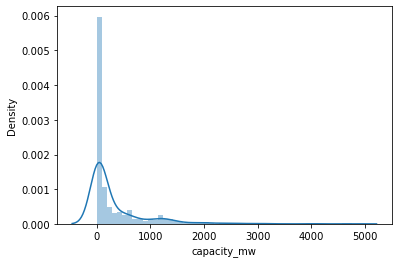

In [752]:
# Now we will visualize continuous column with the help of distplot.
sns.distplot(df['capacity_mw']) # Checking target variable (Capacity_mw)

In [753]:
# This plot is  looking abnormal as the maximum no are showing for zero mw which is not possible. also data is righ side skewed.

<AxesSubplot:xlabel='latitude', ylabel='Density'>

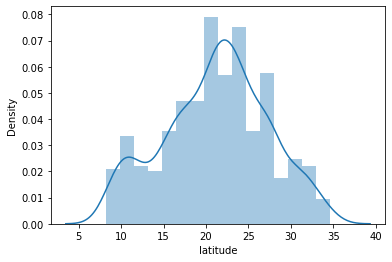

In [754]:
sns.distplot(df['latitude'])

In [755]:
# This plot is looking quite normal.

<AxesSubplot:xlabel='longitude', ylabel='Density'>

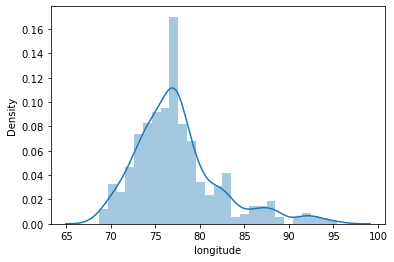

In [756]:
sns.distplot(df['longitude'])

In [757]:
# Data is looking right skewed. however looking slight normal.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

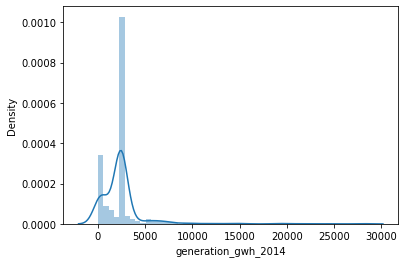

In [758]:
sns.distplot(df['generation_gwh_2014'])

In [759]:
# This plot is  looking abnormal as data is righ side skewed.

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

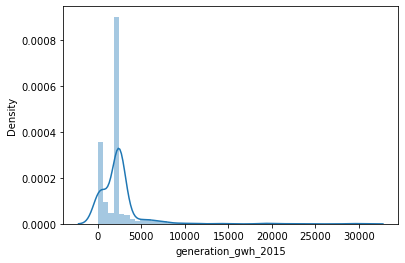

In [760]:
sns.distplot(df['generation_gwh_2015'])

In [761]:
# This plot is  looking abnormal as data is righ side skewed.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

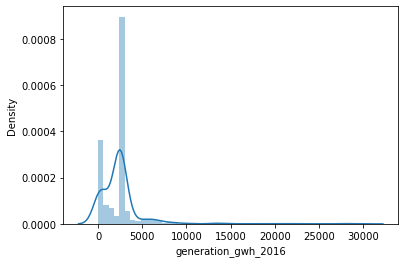

In [762]:
sns.distplot(df['generation_gwh_2016'])

In [763]:
# This plot is  looking abnormal as data is righ side skewed.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

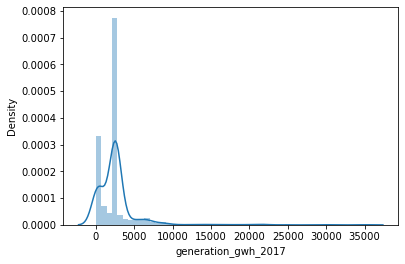

In [764]:
sns.distplot(df['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

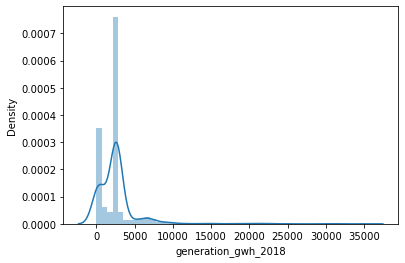

In [765]:
sns.distplot(df['generation_gwh_2018'])

# Now we will check relationship of every year (continuous data) with target variable. (Capacity_mw)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

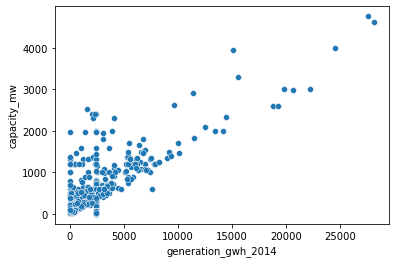

In [766]:
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw', data = df)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

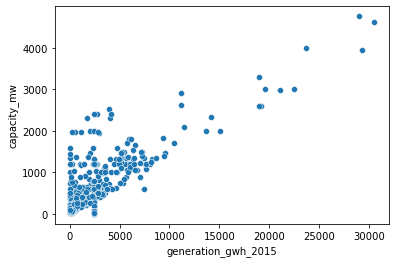

In [767]:
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw', data = df)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

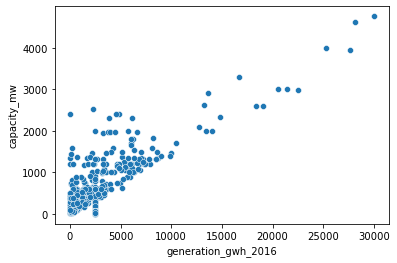

In [768]:
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw', data = df)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

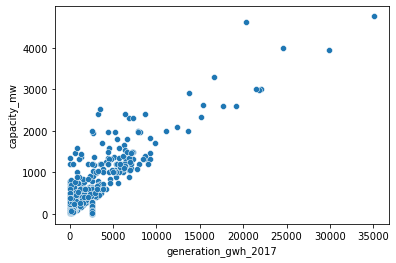

In [769]:
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw', data = df)

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

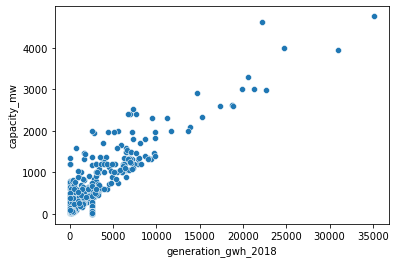

In [770]:
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw', data = df)

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

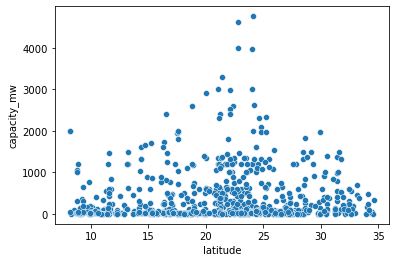

In [771]:
sns.scatterplot(x='latitude',y='capacity_mw',data=df) 

In [772]:
# We can check all the year data are positive correlate with our target variable.
# latitude column having less relationship. will check this from heatmap.

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='primary_fuel'>

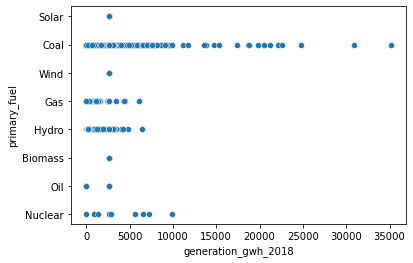

In [773]:
# Now checking relationship with primary fuel

sns.scatterplot(x='generation_gwh_2018',y='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='primary_fuel'>

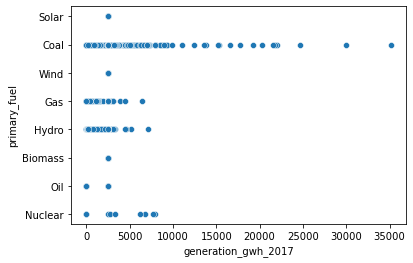

In [774]:
sns.scatterplot(x='generation_gwh_2017',y='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='primary_fuel'>

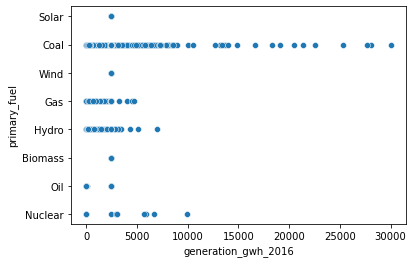

In [775]:
sns.scatterplot(x='generation_gwh_2016',y='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='primary_fuel'>

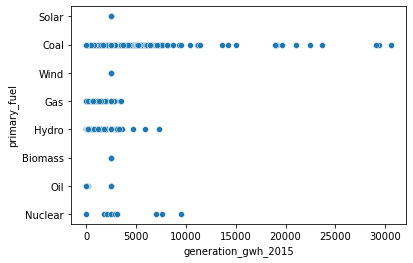

In [776]:
sns.scatterplot(x='generation_gwh_2015',y='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='primary_fuel'>

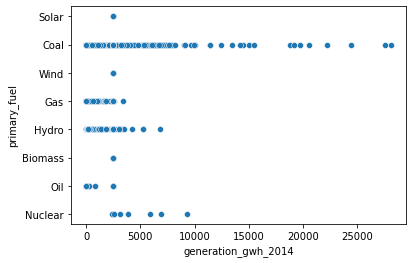

In [777]:
sns.scatterplot(x='generation_gwh_2014',y='primary_fuel',data=df)

In [778]:
# from above plots, we can say that all the year's data having positive relationship with primary fuel type.

# Cor-relation with Heatmap

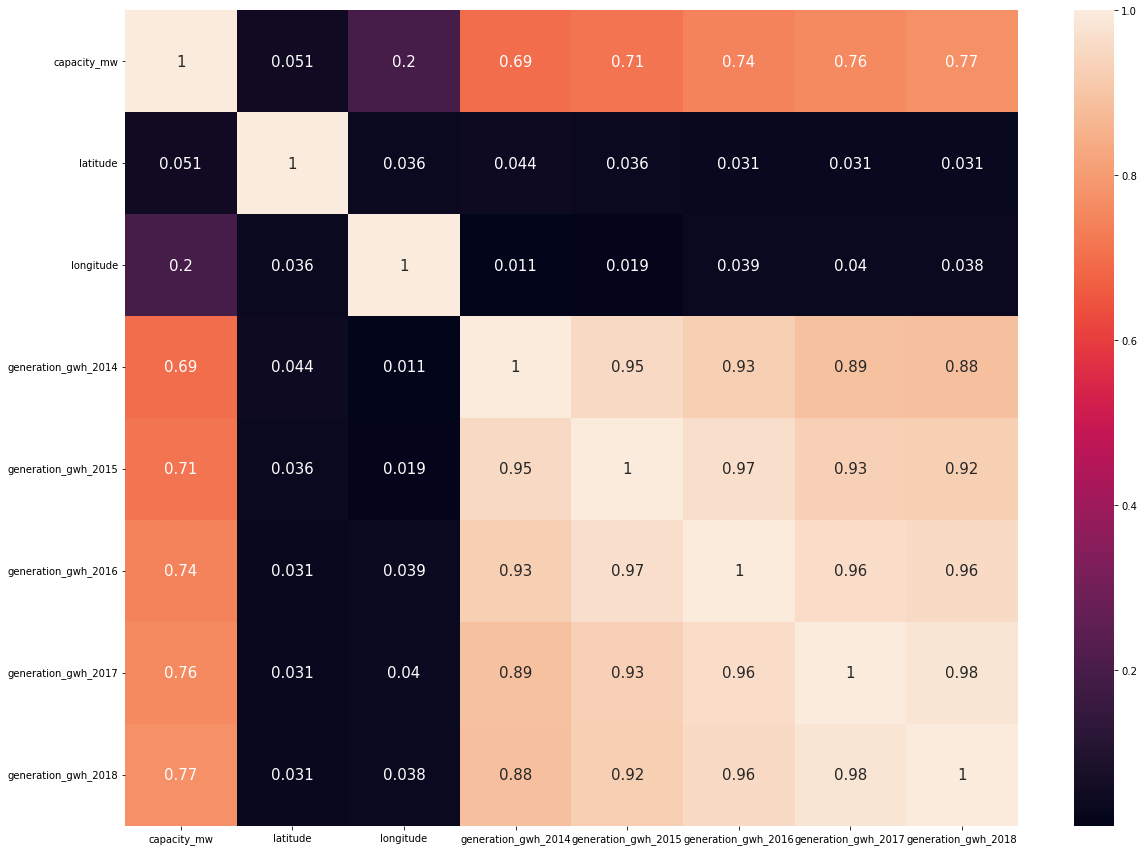

In [779]:
df_corr=df.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True, annot_kws={'size':15})
plt.show()

In [780]:
# from above heatmap, we can say that Mostly all the years having positive relationship with target variable(Capacity-mw). also all the years have positive relation with primary fuel.


In [781]:
df['primary_fuel'].unique() # Checking unique values of Primary Fuel.

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [782]:
df['other_fuel1'].unique() # Checking unique values of other fuel column.

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

# Encoding of Categorical column with Label Encoder

In [783]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['other_fuel1'] = encoder.fit_transform(df['other_fuel1'])

In [784]:
df.info() # Checking again after encoding the categorical column.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 0 to 906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          901 non-null    float64
 1   latitude             901 non-null    float64
 2   longitude            901 non-null    float64
 3   primary_fuel         901 non-null    int32  
 4   other_fuel1          901 non-null    int32  
 5   generation_gwh_2014  901 non-null    float64
 6   generation_gwh_2015  901 non-null    float64
 7   generation_gwh_2016  901 non-null    float64
 8   generation_gwh_2017  901 non-null    float64
 9   generation_gwh_2018  901 non-null    float64
dtypes: float64(8), int32(2)
memory usage: 70.4 KB


# Data Normalization and Standardization

In [785]:
# wew will use Z score method.

from scipy.stats import zscore
z=np.abs(zscore(df))
z

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.551087,1.145996,0.875370,1.227345,0.054484,1.701438e-16,0.000000,1.575775e-16,0.000000,0.000000
1,0.389544,0.585365,0.591821,0.964169,0.054484,1.701438e-16,0.000000,1.575775e-16,0.000000,0.000000
2,0.489007,0.115794,1.676820,1.665647,0.054484,1.701438e-16,0.000000,1.575775e-16,0.000000,0.000000
3,0.326957,0.438531,2.879480,0.525866,0.054484,6.787212e-01,0.552609,5.481659e-01,0.643087,0.649698
4,2.489472,0.125063,1.024570,0.964169,0.054484,2.258843e-01,1.216537,1.308122e+00,0.968673,1.539282
...,...,...,...,...,...,...,...,...,...,...
902,2.151162,0.804302,0.022403,0.964169,0.054484,1.701438e-16,0.846530,7.742361e-01,0.574263,0.629870
903,0.550241,1.362324,0.145161,1.227345,0.054484,1.701438e-16,0.000000,1.575775e-16,0.000000,0.000000
904,0.512181,0.971477,0.390376,1.665647,0.054484,1.701438e-16,0.000000,1.575775e-16,0.000000,0.000000
905,0.419992,0.517074,0.770306,0.964169,0.054484,1.701438e-16,0.000000,1.575775e-16,0.000000,0.000000


In [786]:
threshold=3 # taking thresold 3 & Checking outliers.
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 244, 308, 308, 308, 308, 308,
       308, 323, 333, 340, 360, 363, 364, 364, 364, 364, 364, 364, 375,
       416, 427, 481, 492, 492, 492, 492, 492, 492, 493, 493, 493, 493,
       493, 493, 498, 517, 543, 574, 635, 645, 645, 645, 645, 645, 645,
       654, 654, 654, 654, 654, 654, 691, 691, 691, 691, 691, 691, 717,
       717, 717, 720, 720, 720, 720, 720, 722, 722, 722, 722, 722, 722,
       761, 780, 780, 780, 780, 780, 780, 782, 802, 802, 802, 802, 802,
       802, 805, 807, 811, 812, 874, 874, 874, 874, 874, 874], dtype=int64), array([0, 6, 7, 8, 9, 0, 5, 6, 7, 8, 9, 0, 5, 2, 2, 5, 6, 7, 8, 9, 2, 0,
       5, 6, 7, 8, 9, 2, 2, 2, 2, 0, 0, 5, 6, 7, 8, 9, 0, 2, 2, 0, 0, 5,
       6, 7, 8, 9, 0, 5, 6, 7, 8, 9, 2, 2, 2, 2, 2, 0, 5, 6, 7, 8, 9, 0,
       5, 6, 7, 8, 9, 0, 5, 6, 7, 8, 9, 5, 6, 7, 5, 6, 7, 8, 9, 0, 5, 6,
       7, 8, 9, 0, 0, 5, 6, 7, 8, 9, 0, 0, 5, 6, 7, 8,

In [787]:
df_new=df[(z<3).all(axis=1)]  # Filter the outliers from data set.

In [788]:
df.shape # Checking shape again

(901, 10)

In [789]:
df_new.shape # Checking shape after filtering the outliers.

(860, 10)

In [790]:
Data_loss=(901-860)*100/901
print ('Data Loss is ',Data_loss,'%')

Data Loss is  4.550499445061043 %


# Now Spliting the data set in features ans columns

In [791]:
x=df.drop(['capacity_mw'],axis=1) # First we will check continuous target variable.
y=df['capacity_mw']

# Train Test Split

In [792]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=421)

In [793]:
x_train.shape # Checking shape of training data.

(675, 9)

In [794]:
x_test.shape # Checking shape of test data.

(226, 9)

In [795]:
# Importing necessary library for Regression model

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [796]:
# Predict with Linear Regression

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.7184648924182736


In [797]:
print(mean_squared_error(LR_predict,y_test))
print(mean_absolute_error(LR_predict,y_test))
print(r2_score(LR_predict,y_test))

121078.77472001623
247.57524955572632
0.04390634462349963


In [798]:
# Predict with Ridge Model

from sklearn.linear_model import Ridge
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.7184593469817501


In [799]:
# Predict with Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9801634710166185


In [800]:
print(mean_squared_error(LR_predict,y_test))
print(mean_absolute_error(LR_predict,y_test))
print(r2_score(LR_predict,y_test))

121078.77472001623
247.57524955572632
0.04390634462349963


In [801]:
# Predict with Gradient Boost

from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9704664414605476


In [802]:
print(mean_squared_error(LR_predict,y_test))
print(mean_absolute_error(LR_predict,y_test))
print(r2_score(LR_predict,y_test))

121078.77472001623
247.57524955572632
0.04390634462349963


In [803]:
# Predict with Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9999785836233961


In [804]:
print(mean_squared_error(LR_predict,y_test))
print(mean_absolute_error(LR_predict,y_test))
print(r2_score(LR_predict,y_test))

121078.77472001623
247.57524955572632
0.04390634462349963


# Cross Validation

In [805]:
#Linear reagression

from sklearn.model_selection import cross_val_score

print(cross_val_score(LR,x,y,cv=5).mean())

0.632559414609467


In [806]:
#Decision Tree Regressor

from sklearn.model_selection import cross_val_score

print(cross_val_score(DTR,x,y,cv=5).mean())

0.7568104891374079


In [807]:
# Ridge regression

from sklearn.model_selection import cross_val_score

print(cross_val_score(R,x,y,cv=5).mean())

0.6325721372649888


In [808]:
# Random Forest Regressor

from sklearn.model_selection import cross_val_score

print(cross_val_score(RF,x,y,cv=5).mean())

0.850452622422497


In [809]:
from sklearn.model_selection import GridSearchCV

In [810]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [811]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [812]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [813]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [814]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 47836.01045440653
MAE: 108.02238659960932
r2_score: 0.7459519305356914


# Primary_Fuel AS TARGET

In [815]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [816]:
x.shape

(901, 9)

In [817]:
y.shape

(901,)

In [818]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [819]:
x_train.shape

(675, 9)

In [820]:
x_test.shape

(226, 9)

In [821]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

lg=LogisticRegression()
lg.fit(x_train,y_train)
LR_predicted=lg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",lg.score(x_train,y_train))
print("Test accuracy::",lg.score(x_test,y_test))

0.4469026548672566
[[ 0  0  0  0  0  0 15  0]
 [ 0 33  2 16  0  0  8  1]
 [ 0  4  1 10  0  1  1  0]
 [ 0  3  0 41  1  0 22  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  2  0  2  0  1  2  0]
 [ 0  1  0  0  0  0 23  1]
 [ 0  8  0  0  0  0 22  2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.62      0.55      0.58        60
           2       0.33      0.06      0.10        17
           3       0.59      0.61      0.60        67
           4       0.00      0.00      0.00         3
           5       0.50      0.14      0.22         7
           6       0.25      0.92      0.39        25
           7       0.50      0.06      0.11        32

    accuracy                           0.45       226
   macro avg       0.35      0.29      0.25       226
weighted avg       0.48      0.45      0.41       226

Training accuracy:: 0.5125925925925926
Test accuracy:: 0.4469026548672566


In [822]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.6415929203539823
[[ 9  2  0  1  0  0  1  2]
 [ 1 34  9  8  2  1  1  4]
 [ 0  3 10  2  0  2  0  0]
 [ 2  5  2 50  0  0  3  5]
 [ 0  1  0  2  0  0  0  0]
 [ 1  1  2  0  0  3  0  0]
 [ 2  1  0  0  0  0 20  2]
 [ 1  5  0  4  0  0  3 19]]
              precision    recall  f1-score   support

           0       0.56      0.60      0.58        15
           1       0.65      0.57      0.61        60
           2       0.43      0.59      0.50        17
           3       0.75      0.75      0.75        67
           4       0.00      0.00      0.00         3
           5       0.50      0.43      0.46         7
           6       0.71      0.80      0.75        25
           7       0.59      0.59      0.59        32

    accuracy                           0.64       226
   macro avg       0.53      0.54      0.53       226
weighted avg       0.64      0.64      0.64       226

Training accuracy:: 1.0
Test accuracy:: 0.6415929203539823


In [823]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.5398230088495575
[[ 8  2  0  1  0  0  1  3]
 [ 2 44  6  6  0  0  0  2]
 [ 0  8  2  6  0  1  0  0]
 [ 6  9  0 42  0  0  4  6]
 [ 0  2  1  0  0  0  0  0]
 [ 0  2  0  2  0  1  0  2]
 [ 1  6  0  3  0  0 13  2]
 [ 2 10  0  5  0  1  2 12]]
              precision    recall  f1-score   support

           0       0.42      0.53      0.47        15
           1       0.53      0.73      0.62        60
           2       0.22      0.12      0.15        17
           3       0.65      0.63      0.64        67
           4       0.00      0.00      0.00         3
           5       0.33      0.14      0.20         7
           6       0.65      0.52      0.58        25
           7       0.44      0.38      0.41        32

    accuracy                           0.54       226
   macro avg       0.41      0.38      0.38       226
weighted avg       0.52      0.54      0.52       226

Training accuracy:: 0.7244444444444444
Test accuracy:: 0.5398230088495575


In [824]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.6991150442477876
[[10  1  0  0  0  0  1  3]
 [ 1 43  6  5  0  1  0  4]
 [ 0  4  7  3  0  3  0  0]
 [ 1  3  0 53  0  0  3  7]
 [ 0  3  0  0  0  0  0  0]
 [ 1  1  2  0  0  3  0  0]
 [ 1  1  0  0  0  0 20  3]
 [ 1  1  0  4  0  0  4 22]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.75      0.72      0.74        60
           2       0.47      0.41      0.44        17
           3       0.82      0.79      0.80        67
           4       0.00      0.00      0.00         3
           5       0.43      0.43      0.43         7
           6       0.71      0.80      0.75        25
           7       0.56      0.69      0.62        32

    accuracy                           0.70       226
   macro avg       0.55      0.56      0.56       226
weighted avg       0.69      0.70      0.69       226

Training accuracy:: 1.0
Test accuracy:: 0.6991150442477876
